In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/spam.csv',encoding='latin-1')

In [39]:
df.reset_index(drop=True, inplace=True)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df = df.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

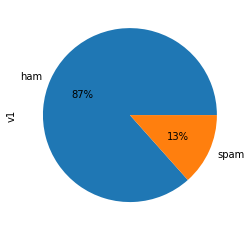

In [17]:
df['v1'].value_counts().plot(kind='pie',autopct='%1.0f%%');

# Splitting Train and Test set

In [34]:
from sklearn.preprocessing import LabelEncoder
df  = df.reset_index(drop=True)
X = df.v2
y = df.v1
enc=LabelEncoder()
y= enc.fit_transform(y).reshape(-1,1)
  

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle = True, random_state = 42)


In [47]:
from keras.utils import pad_sequences
max_words = 1000
tk  = Tokenizer(num_words = max_words)
max_len = 150
tk.fit_on_texts(X_train)
seq = tk.texts_to_sequences(X_train)
seq_matrix = pad_sequences(seq,maxlen=max_len)


#Model

In [57]:
from keras import Sequential
model = Sequential()

model.add(Embedding(max_words,50,input_length=max_len))
model.add(LSTM(128, activation='tanh'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_3 (LSTM)               (None, 128)               91648     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 158,289
Trainable params: 158,289
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=RMSprop())

In [59]:
model.fit(seq_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=3,mode='min')])

Epoch 1/10
27/27 [==============================] - 16s 520ms/step - loss: 0.3920 - accuracy: 0.8693 - val_loss: 0.3033 - val_accuracy: 0.9761
Epoch 2/10
27/27 [==============================] - 13s 497ms/step - loss: 0.1174 - accuracy: 0.9737 - val_loss: 0.0753 - val_accuracy: 0.9797
Epoch 3/10
27/27 [==============================] - 13s 498ms/step - loss: 0.0477 - accuracy: 0.9868 - val_loss: 0.0492 - val_accuracy: 0.9844
Epoch 4/10
27/27 [==============================] - 13s 495ms/step - loss: 0.0350 - accuracy: 0.9904 - val_loss: 0.0441 - val_accuracy: 0.9821
Epoch 5/10
27/27 [==============================] - 14s 502ms/step - loss: 0.0243 - accuracy: 0.9919 - val_loss: 0.0579 - val_accuracy: 0.9856
Epoch 6/10
27/27 [==============================] - 15s 546ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0639 - val_accuracy: 0.9833
Epoch 7/10
27/27 [==============================] - 13s 495ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0586 - val_accuracy: 0.9856

In [61]:
test_seq = tk.texts_to_sequences(X_test)
test_seq_matrix = pad_sequences(test_seq,maxlen=max_len)

In [62]:
metrics = model.evaluate(test_seq_matrix,y_test)

44/44 [==============================] - 3s 75ms/step - loss: 0.0993 - accuracy: 0.9792


In [63]:
print(f'Test Set Metrics :\n Accuracy : {metrics[1]} \n Loss {metrics[0]}')

Test Set Metrics :
 Accuracy : 0.9791816473007202 
 Loss 0.09927848726511002
